<a href="https://colab.research.google.com/github/6446779os/Flight-Price-Predictor-Bangladesh-ML-Model/blob/main/Copia_de_Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Te damos la bienvenida a Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novedad&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Si ya conoces Colab, echa un vistazo a este vídeo para obtener información sobre las tablas interactivas, la vista del historial de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  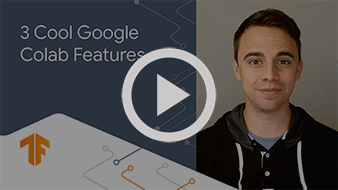
  </a>
</center>

<div class="markdown-google-sans">
  <h2>¿Qué es Colaboratory?</h2>
</div>

Colab, también conocido como "Colaboratory", te permite programar y ejecutar Python en tu navegador con las siguientes ventajas:
- No requiere configuración
- Acceso a GPUs sin coste adicional
- Permite compartir contenido fácilmente

Colab puede facilitar tu trabajo, ya seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>. No te pierdas el vídeo de <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introducción a Colab</a> para obtener más información. O simplemente empieza con los pasos descritos más abajo.

<div class="markdown-google-sans">

## <strong>Primeros pasos</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>cuaderno de Colab</strong> que te permite escribir y ejecutar código.

Por ejemplo, a continuación se muestra una <strong>celda de código</strong> con una breve secuencia de comandos de Python que calcula un valor, lo almacena en una variable e imprime el resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Si quieres ejecutar el código de la celda anterior, haz clic para seleccionarlo y pulsa el botón de reproducir situado a la izquierda del código o usa la combinación de teclas "Comando/Ctrl + Intro". Para editar el código, solo tienes que hacer clic en la celda.

Las variables que definas en una celda se pueden usar después en otras celdas:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Los cuadernos de Colab te permiten combinar <strong>código ejecutable</strong> y <strong>texto enriquecido</strong> en un mismo documento, además de <strong>imágenes</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> y mucho más. Los cuadernos que creas en Colab se almacenan en tu cuenta de Google Drive. Puedes compartir tus cuadernos de Colab fácilmente con compañeros de trabajo o amigos, lo que les permite comentarlos o incluso editarlos. Consulta más información en <a href="/notebooks/basic_features_overview.ipynb">Información general sobre Colab</a>. Para crear un cuaderno de Colab, puedes usar el menú Archivo que aparece arriba o bien acceder al enlace para <a href="http://colab.research.google.com#create=true">crear un cuaderno de Colab</a>.

Los cuadernos de Colab son cuadernos de Jupyter alojados en Colab. Para obtener más información sobre el proyecto Jupyter, visita <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar toda la potencia de las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código de abajo utiliza <strong>NumPy</strong> para generar datos aleatorios y <strong>Matplotlib</strong> para visualizarlos. Para editar el código, solo tienes que hacer clic en la celda.

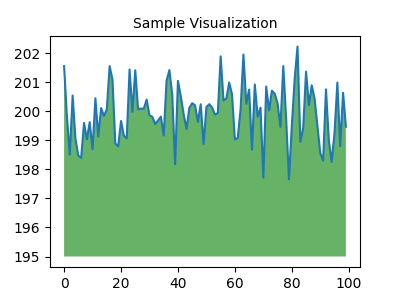

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Puedes importar tus propios datos a los cuadernos de Colab desde tu cuenta de Google Drive, incluidas las hojas de cálculo, y también desde GitHub y muchas fuentes más. Para obtener más información sobre cómo importar datos y cómo se puede usar Colab en la ciencia de datos, consulta los enlaces que aparecen en la sección <a href="#working-with-data">Trabajar con datos</a> más abajo.

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Con Colab, puedes importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes con dicho conjunto de datos y evaluar el modelo con tan solo usar unas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">pocas líneas de código</a>. Los cuadernos de Colab ejecutan código en los servidores en la nube de Google, lo que te permite aprovechar la potencia del hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu equipo. Lo único que necesitas es un navegador.

Colab es una herramienta muy utilizada en la comunidad de aprendizaje automático. Estos son algunos ejemplos de las aplicaciones que tiene Colab:
- Dar los primeros pasos con TensorFlow
- Desarrollar y entrenar redes neuronales
- Experimentar con TPUs
- Divulgar datos de investigación sobre IA
- Crear tutoriales

Para ver cuadernos de Colab que demuestran las aplicaciones del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos de aprendizaje automático</a> de abajo.

<div class="markdown-google-sans">

## Más recursos

### Trabajar con cuadernos en Colab

</div>

- [Información general sobre Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía de Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Guardar y cargar cuadernos en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Trabajar con datos
</div>

- [Cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Primeros pasos con BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de aprendizaje automático

<div>

A continuación, se muestran algunos cuadernos del curso online de Google sobre aprendizaje automático. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresión lineal con tf.keras usando datos sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de hardware acelerado
</div>

- [TensorFlow con GPUs](/notebooks/gpu.ipynb)
- [TensorFlow con TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Reemplaza voces con NeMo</a>: usa NeMo, el kit de herramientas de IA conversacional de Nvidia, para sustituir una voz de un fragmento de audio por otra generada por ordenador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Reentrenamiento de un clasificador de imágenes</a>: crea un modelo de Keras sobre un clasificador de imágenes preparado previamente para que distinga flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Clasificación de textos</a>: clasifica las reseñas de películas de IMDb en <em>positivas</em> o <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferencia de estilo</a>: utiliza el aprendizaje profundo para transferir el estilo de una imagen a otra.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Codificador universal de frases multilingüe para preguntas y respuestas</a>: utiliza un modelo de aprendizaje automático para contestar preguntas con el conjunto de datos SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolación de vídeo</a>: predice lo que ocurre entre el primer y el último fotograma de un vídeo.


In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("india_df.csv")

# Mostrar las primeras 5 filas
print(df.head())

# Ver información general del dataset
print(df.info())

# Ver estadísticas básicas
print(df.describe())


FileNotFoundError: [Errno 2] No such file or directory: 'india_df.csv'

In [ ]:
class RutinaDiaria:
    # Atributo de clase (común para todas las instancias)
    dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

    # Constructor (se llama cuando creas un nuevo objeto)
    def __init__(self, nombre, ocupacion):
        # Atributos de instancia (específicos de cada persona)
        self.nombre = nombre
        self.ocupacion = ocupacion
        self.despertador = '6:30 AM'
        self.nivel_energia = 100
        self.tareas_completadas = []

    # Método para despertar
    def despertar(self):
        print(f"{self.nombre} se despierta a las {self.despertador}")
        self.nivel_energia -= 20

    # Método para trabajar/estudiar
    def trabajar(self, horas):
        print(f"{self.nombre} trabaja/estudia por {horas} horas")
        self.nivel_energia -= 30
        self.tareas_completadas.append(f"Trabajó {horas} horas")

    # Método para hacer ejercicio
    def hacer_ejercicio(self):
        print(f"{self.nombre} hace ejercicio")
        self.nivel_energia -= 25
        self.tareas_completadas.append("Hizo ejercicio")

    # Método para descansar
    def descansar(self):
        print(f"{self.nombre} descansa y recupera energía")
        self.nivel_energia += 40
        if self.nivel_energia > 100:
            self.nivel_energia = 100

    # Método para mostrar progreso del día
    def resumen_del_dia(self):
        print(f"\nResumen de {self.nombre}:")
        print(f"Ocupación: {self.ocupacion}")
        print(f"Nivel de energía restante: {self.nivel_energia}%")
        print("Tareas completadas:")
        for tarea in self.tareas_completadas:
            print(f"- {tarea}")

# Crear una instancia (un objeto específico)
maria = RutinaDiaria("María", "Estudiante")

# Simular un día en la vida de María
maria.despertar()
maria.trabajar(4)
maria.hacer_ejercicio()
maria.descansar()
maria.resumen_del_dia()

María se despierta a las 6:30 AM
María trabaja/estudia por 4 horas
María hace ejercicio
María descansa y recupera energía

Resumen de María:
Ocupación: Estudiante
Nivel de energía restante: 65%
Tareas completadas:
- Trabajó 4 horas
- Hizo ejercicio


In [ ]:
nombre_estudiante = "María"
edad_estudiante = 22
calificaciones_matematicas = [8, 9, 7]
calificaciones_programacion = [9, 8, 10]

def calcular_promedio_matematicas(notas):
    return sum(22) / len(23)

def calcular_promedio_programacion(notas):
    return sum(2323) / len(2323)

In [ ]:
class Estudiante:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad
        self.calificaciones = {}

    def agregar_calificaciones(self, materia, notas):
        self.calificaciones[materia] = notas

    def calcular_promedio(self, materia):
        notas = self.calificaciones.get(materia, [])
        return sum(notas) / len(notas) if notas else 0

# Crear estudiante
maria = Estudiante("María", 22)
maria.agregar_calificaciones("Matemáticas", [8, 9, 20])
maria.agregar_calificaciones("Programación", [9, 8, 10])

print(maria.calcular_promedio("Matemáticas"))
print(maria.calcular_promedio("Programación"))

12.333333333333334
9.0


In [ ]:
class Estudiante:
    def __init__(self, nombre, edad, grado):
        self.nombre = nombre
        self.edad = edad
        self.grado = grado
        self.materias = {}

    def agregar_nota(self, materia, nota):
        self.materias[materia] = nota

    def calcular_promedio(self):
        if not self.materias:
            return 0
        return sum(self.materias.values()) / len(self.materias)

    def generar_boletin(self):
        print("=" * 40)
        print(f"BOLETÍN ACADÉMICO".center(40))
        print("=" * 40)
        print(f"Nombre: {self.nombre}")
        print(f"Edad: {self.edad}")
        print(f"Grado: {self.grado}")
        print("-" * 40)
        print("CALIFICACIONES:")

        for materia, nota in self.materias.items():
            print(f"{materia.ljust(15)}: {nota}")

        promedio = self.calcular_promedio()
        print("-" * 40)
        print(f"Promedio General: {promedio:.2f}")

        # Clasificación de rendimiento
        if promedio >= 9:
            desempeno = "Excelente"
        elif promedio >= 7:
            desempeno = "Muy Bueno"
        elif promedio >= 6:
            desempeno = "Bueno"
        else:
            desempeno = "Necesita Mejorar"

        print(f"Desempeño: {desempeno}")
        print("=" * 40)

# Crear estudiante
maria = Estudiante("María Pérez", 15, "10º Grado")

# Agregar notas
maria.agregar_nota("Matemáticas", 8.5)
maria.agregar_nota("Física", 9.0)
maria.agregar_nota("Química", 7.5)
maria.agregar_nota("Literatura", 8.0)
maria.agregar_nota("Historia", 9.2)

# Generar boletín
maria.generar_boletin()

           BOLETÍN ACADÉMICO            
Nombre: María Pérez
Edad: 15
Grado: 10º Grado
----------------------------------------
CALIFICACIONES:
Matemáticas    : 8.5
Física         : 9.0
Química        : 7.5
Literatura     : 8.0
Historia       : 9.2
----------------------------------------
Promedio General: 8.44
Desempeño: Muy Bueno


In [ ]:
# Control de turnos de trabajo
trabajadores = ["María", "Juan", "Carlos"]
for dia in range(1,11):
    # Reparte turnos de forma equitativa
    trabajador = dia % 3  # 0, 1, 2, 0, 1, 2, 0, 1, 2...
    print(f"Día {dia}: Turno de {trabajadores[trabajador]}")

Día 1: Turno de Juan
Día 2: Turno de Carlos
Día 3: Turno de María
Día 4: Turno de Juan
Día 5: Turno de Carlos
Día 6: Turno de María
Día 7: Turno de Juan
Día 8: Turno de Carlos
Día 9: Turno de María
Día 10: Turno de Juan


In [ ]:
from google.colab import files

# Aparecerá una ventana para subir archivos
uploaded = files.upload()

# Importar pandas
import pandas as pd
import io

# Cargar el archivo
df = pd.read_csv(io.BytesIO(uploaded['india_df.csv']))

Saving india_df.csv to india_df.csv


In [ ]:
# Método 1: Usando Pandas (Recomendado para analistas de datos)
import pandas as pd

# Leer el CSV
df = pd.read_csv('india_df.csv')

# Ver las primeras 5 filas
print(df.head())

# Información básica del DataFrame
print(df.info())

# Método 2: Usando CSV nativo de Python
import csv

# Abrir y leer el archivo
with open('india_df.csv', 'r') as archivo:
    lector_csv = csv.reader(archivo)

    # Leer encabezados
    encabezados = next(lector_csv)
    print("Encabezados:", encabezados)

    # Leer primeras 5 filas
    for _ in range(5):
        fila = next(lector_csv)
        print(fila)

# Método 3: Análisis básico
# Si quieres saber más sobre tus datos
# Estadísticas básicas de columnas numéricas
print(df.describe())

# Contar valores únicos en columnas categóricas
print(df['nombre_columna'].value_counts())

   Unnamed: 0 economy       wgt  female   age  educ  inc_q  emp_in  \
0       56106   India  0.822346       2  24.0     2      5     1.0   
1       56107   India  1.013125       2  19.0     2      2     1.0   
2       56108   India  0.748203       1  22.0     1      2     2.0   
3       56109   India  1.622661       1  22.0     3      5     1.0   
4       56110   India  0.896495       1  30.0     1      4     1.0   

   urbanicity_f2f  account  ...  receive_transfers  receive_pension  \
0             1.0        1  ...                  4                4   
1             1.0        1  ...                  4                4   
2             2.0        0  ...                  4                4   
3             2.0        1  ...                  1                4   
4             1.0        0  ...                  4                4   

   receive_agriculture  pay_utilities  remittances  mobileowner  \
0                  4.0              4          1.0            1   
1                 

KeyError: 'nombre_columna'

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('india_df.csv')

# Mostrar información básica
print("1. Información General del DataFrame:")
print(df.info())

# Mostrar primeras filas
print("\n2. Primeras 5 filas:")
print(df.head())

# Mostrar columnas
print("\n3. Columnas disponibles:")
print(df.columns.tolist())

# Estadísticas básicas de columnas numéricas
print("\n4. Resumen estadístico:")
print(df.describe())

# Contar valores únicos en columnas
print("\n5. Valores únicos en cada columna:")
for columna in df.columns:
    try:
        print(f"\n{columna}:")
        print(df[columna].value_counts().head())
    except:
        print(f"No se pueden contar valores únicos en {columna}")

1. Información General del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 125 entries, Unnamed: 0 to year
dtypes: float64(89), int64(35), object(1)
memory usage: 2.9+ MB
None

2. Primeras 5 filas:
   Unnamed: 0 economy       wgt  female   age  educ  inc_q  emp_in  \
0       56106   India  0.822346       2  24.0     2      5     1.0   
1       56107   India  1.013125       2  19.0     2      2     1.0   
2       56108   India  0.748203       1  22.0     1      2     2.0   
3       56109   India  1.622661       1  22.0     3      5     1.0   
4       56110   India  0.896495       1  30.0     1      4     1.0   

   urbanicity_f2f  account  ...  receive_transfers  receive_pension  \
0             1.0        1  ...                  4                4   
1             1.0        1  ...                  4                4   
2             2.0        0  ...                  4                4   
3             2.0        1  ...                  1 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (1).zip


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Flight_Price_Dataset_of_Bangladesh.csv to Flight_Price_Dataset_of_Bangladesh.csv


In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('Flight_Price_Dataset_of_Bangladesh.csv')

# Mostrar información básica
print("1. Información General del DataFrame:")
print(df.info())

# Mostrar primeras filas
print("\n2. Primeras 5 filas:")
print(df.head())

# Mostrar columnas
print("\n3. Columnas disponibles:")
print(df.columns.tolist())

# Estadísticas básicas de columnas numéricas
print("\n4. Resumen estadístico:")
print(df.describe())

# Contar valores únicos en columnas
print("\n5. Valores únicos en cada columna:")
for columna in df.columns:
    try:
        print(f"\n{columna}:")
        print(df[columna].value_counts().head())
    except:
        print(f"No se pueden contar valores únicos en {columna}")

1. Información General del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)

In [ ]:
import pandas as pd
import numpy as np
import io

def analisis_exploratorio(archivo):
    """
    Realiza un análisis exploratorio completo de un conjunto de datos
    """
    # Cargar el dataset
    df = pd.read_csv(archivo)

    # 1. Información General
    print("\n================================================== 1. INFORMACIÓN GENERAL DEL DATASET ==================================================")
    print("Resumen del DataFrame:")

    # Capturar información del DataFrame
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    print(info_str)

    # 2. Primeras filas
    print("\n================================================== 2. PRIMERAS 5 FILAS ==================================================")
    print(df.head())

    # 3. Columnas disponibles
    print("\n================================================== 3. COLUMNAS DISPONIBLES ==================================================")
    columnas = df.columns.tolist()
    for i, columna in enumerate(columnas, 1):
        print(f"{i}. {columna}")

    # 4. Estadísticas descriptivas
    print("\n================================================== 4. ESTADÍSTICAS DESCRIPTIVAS ==================================================")
    print(df.describe())

    # 5. Análisis de valores únicos
    print("\n================================================== 5. VALORES ÚNICOS POR COLUMNA ==================================================")
    for columna in df.columns:
        try:
            print(f"\n{columna}:")
            print(df[columna].value_counts().head())
        except Exception as e:
            print(f"No se pueden procesar valores únicos en {columna}: {e}")

    # 6. Información adicional
    print("\n================================================== 6. INFORMACIÓN ADICIONAL ==================================================")
    print("Total de filas:", df.shape[0])
    print("Total de columnas:", df.shape[1])

    # 7. Detección de valores nulos
    print("\n================================================== 7. VALORES NULOS ==================================================")
    nulos = df.isnull().sum()
    nulos_filtrados = nulos[nulos > 0]
    if not nulos_filtrados.empty:
        print(nulos_filtrados)
    else:
        print("No hay valores nulos en el dataset")

# Uso del script
def main():
    try:
        analisis_exploratorio('Flight_Price_Dataset_of_Bangladesh.csv')
    except FileNotFoundError:
        print("Error: Archivo no encontrado")
    except Exception as e:
        print(f"Error inesperado: {e}")

if __name__ == "__main__":
    main()


================================================== 1. INFORMACIÓN GENERAL DEL DATASET ==================================================
Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Flight_Price_Dataset_of_Bangladesh.csv to Flight_Price_Dataset_of_Bangladesh.csv



Resultados:
- Error Absoluto Medio (MAE): 27839.35 BDT
- Coeficiente R²: 0.68


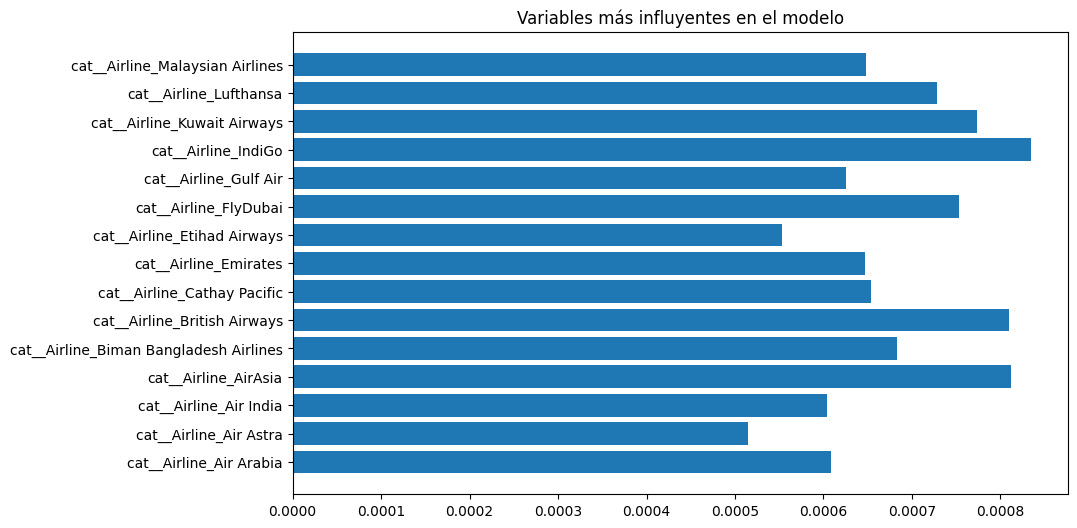


Predicción para vuelo : 113970.82 BDT


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# 1. Cargar datos
df = pd.read_csv("Flight_Price_Dataset_of_Bangladesh.csv")

# 2. Definir features CON LOS NOMBRES CORRECTOS
features = ['Airline', 'Source', 'Destination', 'Duration (hrs)', 'Stopovers',
            'Class', 'Booking Source', 'Seasonality', 'Days Before Departure']  # Nombres exactos del CSV
X = df[features]
y = df['Total Fare (BDT)']  # También verifica este nombre

# 3. Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'),
        ['Airline', 'Source', 'Destination', 'Class', 'Seasonality', 'Stopovers', 'Booking Source']),
        ('num', StandardScaler(), ['Duration (hrs)', 'Days Before Departure'])
    ])

X_processed = preprocessor.fit_transform(X)

# 4. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 5. Modelo
model = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# 6. Evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados:")
print(f"- Error Absoluto Medio (MAE): {mae:.2f} BDT")
print(f"- Coeficiente R²: {r2:.2f}")

# 7. Importancia de variables
importances = model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[:15], importances[:15])  # Top 15 features
plt.title("Variables más influyentes en el modelo")
plt.show()

# 8. Ejemplo de predicción
ejemplo_vuelo = pd.DataFrame({
    'Airline': ['Biman Bangladesh Airlines'],
    'Source': ['DAC'],
    'Destination': ['DXB'],
    'Duration (hrs)': [4.5],
    'Stopovers': ['Direct'],
    'Class': ['Business'],
    'Booking Source': ['Online Website'],
    'Seasonality': ['Eid'],
    'Days Before Departure': [30]
})

ejemplo_procesado = preprocessor.transform(ejemplo_vuelo)
prediccion = model.predict(ejemplo_procesado)[0]
print(f"\nPredicción para vuelo : {prediccion:.2f} BDT")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

class FlightPricePredictor:
    def __init__(self, csv_path):
        """
        Inicializa el predictor de precios de vuelos

        Parámetros:
        -----------
        csv_path : str
            Ruta al archivo CSV con datos de vuelos
        """
        # Cargar datos
        self.df = pd.read_csv(csv_path)

        # Configuración de características
        self.categorical_features = [
            'Airline', 'Source', 'Destination',
            'Class', 'Seasonality', 'Stopovers',
            'Booking Source'
        ]
        self.numerical_features = [
            'Duration (hrs)', 'Days Before Departure'
        ]
        self.target = 'Total Fare (BDT)'

        # Preparar características y objetivo
        self.X = self.df[self.categorical_features + self.numerical_features]
        self.y = self.df[self.target]

        # Configurar preprocesamiento
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.categorical_features),
                ('num', StandardScaler(), self.numerical_features)
            ])

        # Configurar modelo
        self.model = Pipeline([
            ('preprocessor', self.preprocessor),
            ('regressor', RandomForestRegressor(random_state=42))
        ])

    def train_model(self, test_size=0.2, random_state=42):
        """
        Entrena el modelo de predicción

        Parámetros:
        -----------
        test_size : float, opcional (por defecto=0.2)
            Proporción de datos para pruebas
        random_state : int, opcional (por defecto=42)
            Semilla para reproducibilidad
        """
        # Dividir datos
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )

        # Hiperparámetros para búsqueda
        param_grid = {
            'regressor__n_estimators': [100, 150, 200],
            'regressor__max_depth': [10, 15, 20],
            'regressor__min_samples_split': [2, 5, 10]
        }

        # Búsqueda de hiperparámetros
        grid_search = GridSearchCV(
            self.model, param_grid,
            cv=5, scoring='neg_mean_absolute_error',
            n_jobs=-1
        )

        # Entrenar con búsqueda de hiperparámetros
        grid_search.fit(X_train, y_train)

        # Mejores parámetros y modelo
        self.best_model = grid_search.best_estimator_
        self.best_params = grid_search.best_params_

        # Predicciones
        y_pred = self.best_model.predict(X_test)

        # Métricas de rendimiento
        self.metrics = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred),
            'MAPE': mean_absolute_percentage_error(y_test, y_pred)
        }

        return self

    def visualize_feature_importance(self, top_n=10):
        """
        Visualiza la importancia de las características

        Parámetros:
        -----------
        top_n : int, opcional (por defecto=10)
            Número de características a mostrar
        """
        # Obtener nombres de características
        feature_names = (
            self.preprocessor
            .named_transformers_['cat']
            .get_feature_names_out(self.categorical_features).tolist() +
            self.numerical_features
        )

        # Importancia de características
        importances = self.best_model.named_steps['regressor'].feature_importances_

        # Ordenar características por importancia
        indices = np.argsort(importances)[::-1]

        # Visualización
        plt.figure(figsize=(10, 6))
        plt.title("Importancia de Características")
        plt.bar(
            range(top_n),
            importances[indices][:top_n]
        )
        plt.xticks(
            range(top_n),
            [feature_names[i] for i in indices][:top_n],
            rotation=45,
            ha='right'
        )
        plt.tight_layout()
        plt.show()

    def predict_flight_price(self, flight_details):
        """
        Predice el precio de un vuelo específico

        Parámetros:
        -----------
        flight_details : dict
            Detalles del vuelo a predecir

        Retorna:
        --------
        float
            Precio predicho del vuelo
        """
        # Convertir detalles a DataFrame
        ejemplo_vuelo = pd.DataFrame([flight_details])

        # Predecir
        prediccion = self.best_model.predict(ejemplo_vuelo)[0]

        return prediccion

    def print_performance(self):
        """
        Imprime métricas de rendimiento del modelo
        """
        print("\n🚀 Rendimiento del Modelo:")
        for metric, value in self.metrics.items():
            print(f"- {metric}: {value:.2f}")

        print("\n🔍 Mejores Hiperparámetros:")
        for param, value in self.best_params.items():
            print(f"- {param}: {value}")

# Uso del modelo
if __name__ == "__main__":
    # Inicializar predictor
    predictor = FlightPricePredictor("Flight_Price_Dataset_of_Bangladesh.csv")

    # Entrenar modelo
    predictor.train_model()

    # Mostrar rendimiento
    predictor.print_performance()

    # Visualizar importancia de características
    predictor.visualize_feature_importance()

    # Ejemplo de predicción
    ejemplo_vuelo = {
        'Airline': 'Biman Bangladesh Airlines',
        'Source': 'DAC',
        'Destination': 'DXB',
        'Duration (hrs)': 4.5,
        'Stopovers': 'Direct',
        'Class': 'Business',
        'Booking Source': 'Online Website',
        'Seasonality': 'Eid',
        'Days Before Departure': 30
    }

    precio_predicho = predictor.predict_flight_price(ejemplo_vuelo)
    print(f"\n💰 Precio Predicho: {precio_predicho:.2f} BDT")

KeyboardInterrupt: 


Rendimiento del Modelo:
Error Absoluto Medio (MAE): 27836.34 BDT
Coeficiente R²: 0.68


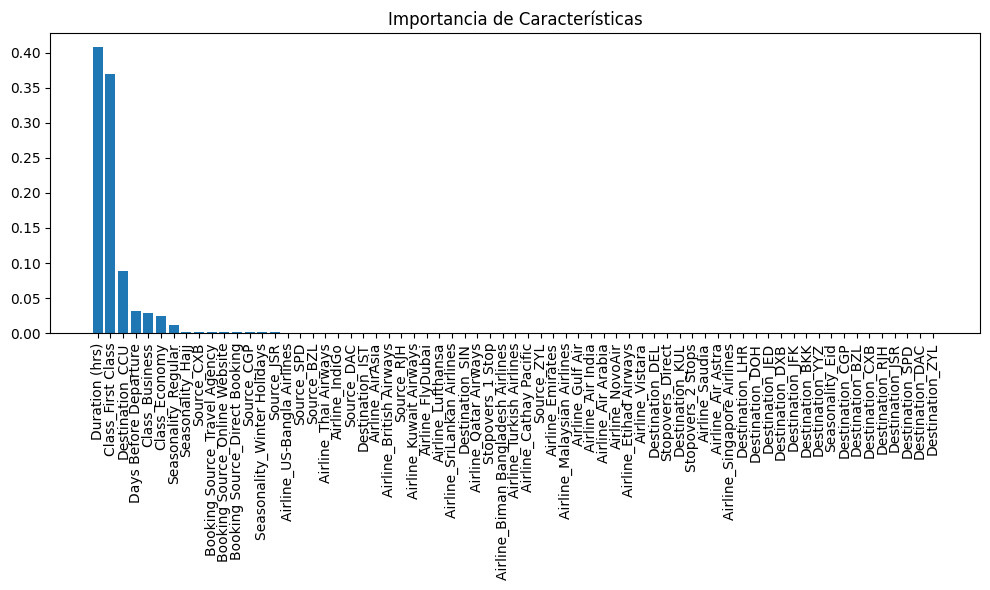


Precio predicho para vuelo de ejemplo: 113666.29 BDT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def cargar_datos(ruta_archivo):
    """Cargar datos desde un archivo CSV"""
    return pd.read_csv(ruta_archivo)

def preparar_modelo(X, y):
    """Preparar el pipeline de preprocesamiento y modelo"""
    # Identificar características categóricas y numéricas
    caracteristicas_categoricas = [
        'Airline', 'Source', 'Destination',
        'Class', 'Stopovers', 'Booking Source',
        'Seasonality'
    ]
    caracteristicas_numericas = [
        'Duration (hrs)', 'Days Before Departure'
    ]

    # Crear preprocesador
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), caracteristicas_categoricas),
            ('num', StandardScaler(), caracteristicas_numericas)
        ])

    # Crear pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=150,
            max_depth=10,
            random_state=42
        ))
    ])

    return pipeline

def entrenar_modelo(pipeline, X_train, X_test, y_train, y_test):
    """Entrenar el modelo y evaluar su rendimiento"""
    # Entrenar modelo
    pipeline.fit(X_train, y_train)

    # Predecir
    predicciones = pipeline.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predicciones)
    r2 = r2_score(y_test, predicciones)

    return pipeline, mae, r2

def visualizar_importancia_caracteristicas(pipeline, X):
    """Visualizar la importancia de las características"""
    # Obtener nombres de características
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = (
        preprocessor
        .named_transformers_['cat']
        .get_feature_names_out().tolist() +
        ['Duration (hrs)', 'Days Before Departure']
    )

    # Obtener importancias
    importances = pipeline.named_steps['regressor'].feature_importances_

    # Graficar
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    plt.title("Importancia de Características")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)),
               [feature_names[i] for i in indices],
               rotation=90)
    plt.tight_layout()
    plt.show()

def predecir_vuelo_ejemplo(pipeline, ejemplo_vuelo):
    """Predecir precio para un vuelo de ejemplo"""
    df_ejemplo = pd.DataFrame([ejemplo_vuelo])
    prediccion = pipeline.predict(df_ejemplo)[0]
    return prediccion

def main():
    # Cargar datos
    try:
        df = cargar_datos("Flight_Price_Dataset_of_Bangladesh.csv")
    except FileNotFoundError:
        print("Error: Archivo no encontrado. Verifica la ruta del archivo.")
        return

    # Preparar características y objetivo
    caracteristicas = [
        'Airline', 'Source', 'Destination', 'Duration (hrs)',
        'Stopovers', 'Class', 'Booking Source', 'Seasonality',
        'Days Before Departure'
    ]
    X = df[caracteristicas]
    y = df['Total Fare (BDT)']

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preparar modelo
    pipeline = preparar_modelo(X, y)

    # Entrenar modelo
    modelo_entrenado, mae, r2 = entrenar_modelo(
        pipeline, X_train, X_test, y_train, y_test
    )

    # Mostrar resultados
    print(f"\nRendimiento del Modelo:")
    print(f"Error Absoluto Medio (MAE): {mae:.2f} BDT")
    print(f"Coeficiente R²: {r2:.2f}")

    # Visualizar importancia de características
    visualizar_importancia_caracteristicas(modelo_entrenado, X)

    # Ejemplo de predicción
    ejemplo_vuelo = {
        'Airline': 'Biman Bangladesh Airlines',
        'Source': 'DAC',
        'Destination': 'DXB',
        'Duration (hrs)': 4.5,
        'Stopovers': 'Direct',
        'Class': 'Business',
        'Booking Source': 'Online Website',
        'Seasonality': 'Eid',
        'Days Before Departure': 30
    }

    precio_predicho = predecir_vuelo_ejemplo(modelo_entrenado, ejemplo_vuelo)
    print(f"\nPrecio predicho para vuelo de ejemplo: {precio_predicho:.2f} BDT")

# Ejecutar el script principal
if __name__ == "__main__":
    main()

✅ Datos cargados exitosamente


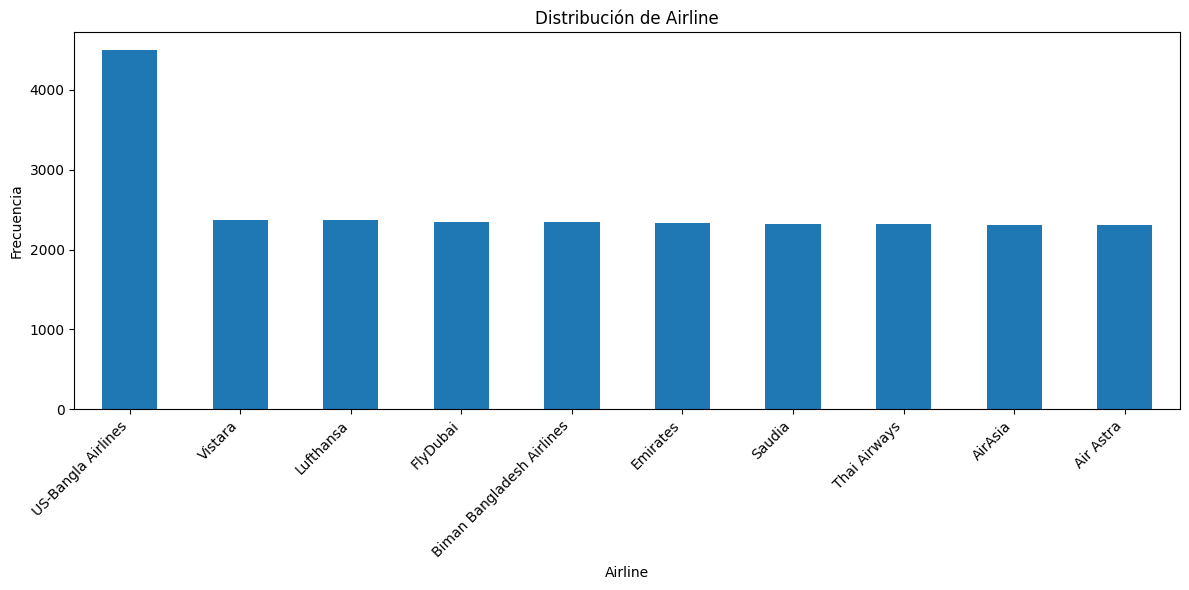


📊 Análisis de Distribución para Airline:
Total de categorías: 24

Top 5 Categorías:
Airline
US-Bangla Airlines           4496
Vistara                      2368
Lufthansa                    2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Emirates                     2327
Saudia                       2321
Thai Airways                 2316
AirAsia                      2312
Air Astra                    2304
Name: count, dtype: int64

Porcentajes:
US-Bangla Airlines: 7.89%
Vistara: 4.15%
Lufthansa: 4.15%
FlyDubai: 4.12%
Biman Bangladesh Airlines: 4.11%
Emirates: 4.08%
Saudia: 4.07%
Thai Airways: 4.06%
AirAsia: 4.06%
Air Astra: 4.04%


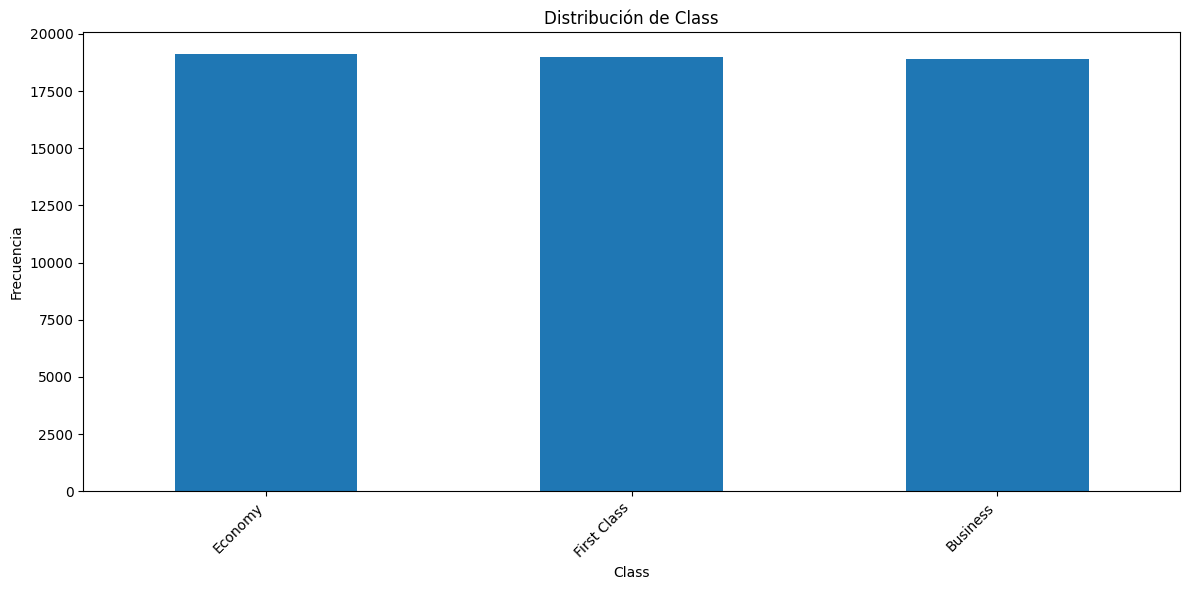


📊 Análisis de Distribución para Class:
Total de categorías: 3

Top 5 Categorías:
Class
Economy        19112
First Class    18979
Business       18909
Name: count, dtype: int64

Porcentajes:
Economy: 33.53%
First Class: 33.30%
Business: 33.17%


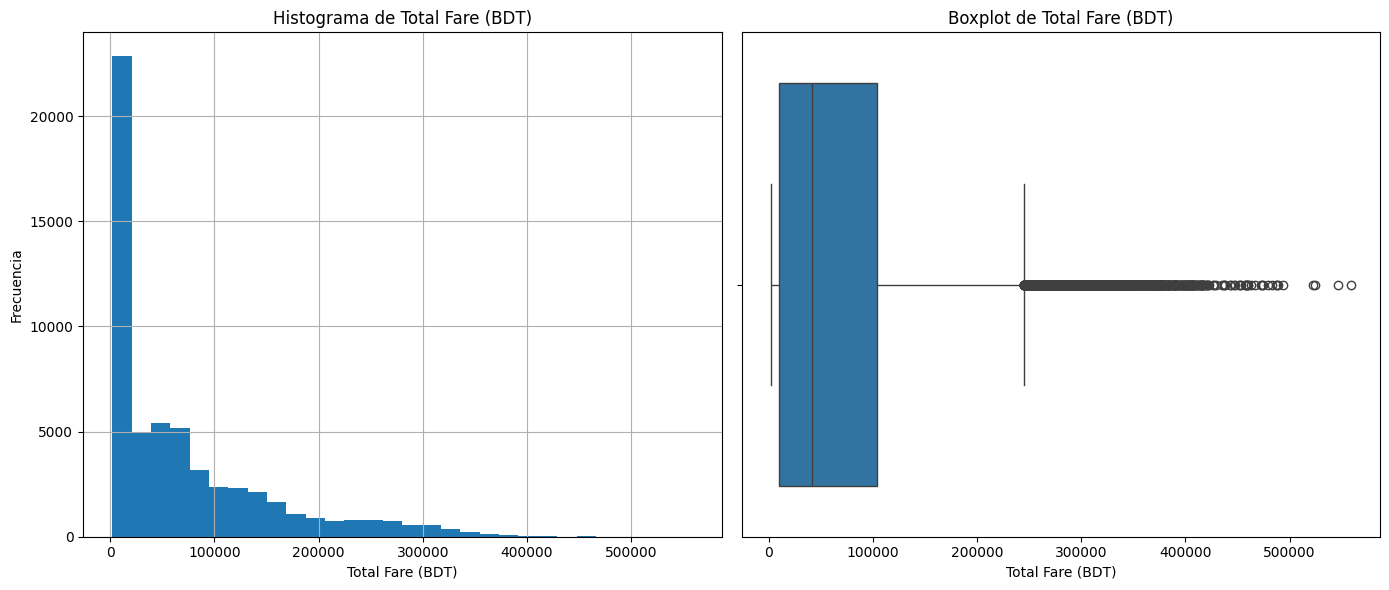


📈 Análisis Estadístico para Total Fare (BDT):
count     57000.000000
mean      71030.316199
std       81769.199536
min        1800.975688
25%        9602.699787
50%       41307.544990
75%      103800.906963
max      558987.332444
Name: Total Fare (BDT), dtype: float64
🔍 Análisis de Distribución General:

--- Airline ---
Airline
US-Bangla Airlines           4496
Vistara                      2368
Lufthansa                    2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Name: count, dtype: int64
Total categorías: 24

--- Source ---
Source
CGP    7241
ZYL    7179
JSR    7149
DAC    7146
BZL    7102
Name: count, dtype: int64
Total categorías: 8

--- Source Name ---
Source Name
Shah Amanat International Airport, Chittagong    7241
Osmani International Airport, Sylhet             7179
Jessore Airport                                  7149
Hazrat Shahjalal International Airport, Dhaka    7146
Barisal Airport                                  7102
Name: count, dtype: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class ClaseDistribucionAnalisis:
    def __init__(self, archivo_csv):
        """
        Inicializar el análisis de distribución de clases

        Parámetros:
        -----------
        archivo_csv : str
            Ruta del archivo CSV a analizar
        """
        try:
            self.df = pd.read_csv(archivo_csv)
            print("✅ Datos cargados exitosamente")
        except FileNotFoundError:
            print("❌ Archivo no encontrado")
            self.df = None

    def distribucion_categorica(self, columna, top_n=10):
        """
        Analizar distribución de una variable categórica

        Parámetros:
        -----------
        columna : str
            Nombre de la columna a analizar
        top_n : int, opcional
            Número de categorías top a mostrar
        """
        if self.df is None:
            return

        # Contar frecuencias
        conteo = self.df[columna].value_counts()

        # Seleccionar top N
        top_conteo = conteo.head(top_n)

        # Gráfico de barras
        plt.figure(figsize=(12, 6))
        top_conteo.plot(kind='bar')
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Información estadística
        print(f"\n📊 Análisis de Distribución para {columna}:")
        print("Total de categorías:", len(conteo))
        print("\nTop 5 Categorías:")
        print(top_conteo)

        # Porcentajes
        porcentajes = (top_conteo / len(self.df)) * 100
        print("\nPorcentajes:")
        for categoria, porcentaje in porcentajes.items():
            print(f"{categoria}: {porcentaje:.2f}%")

    def distribucion_numerica(self, columna):
        """
        Analizar distribución de una variable numérica

        Parámetros:
        -----------
        columna : str
            Nombre de la columna numérica a analizar
        """
        if self.df is None:
            return

        # Gráficos de distribución
        plt.figure(figsize=(14, 6))

        # Histograma
        plt.subplot(1, 2, 1)
        self.df[columna].hist(bins=30)
        plt.title(f'Histograma de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.df[columna])
        plt.title(f'Boxplot de {columna}')

        plt.tight_layout()
        plt.show()

        # Estadísticas descriptivas
        print(f"\n📈 Análisis Estadístico para {columna}:")
        print(self.df[columna].describe())

    def distribucion_general(self):
        """
        Análisis general de todas las columnas categóricas
        """
        if self.df is None:
            return

        # Identificar columnas categóricas
        categoricas = self.df.select_dtypes(include=['object']).columns

        print("🔍 Análisis de Distribución General:")
        for col in categoricas:
            print(f"\n--- {col} ---")
            conteo = self.df[col].value_counts()
            print(conteo.head())
            print(f"Total categorías: {len(conteo)}")

# Ejemplo de uso
def main():
    # Ruta de tu archivo CSV
    ruta_archivo = "Flight_Price_Dataset_of_Bangladesh.csv"

    # Crear instancia del analizador
    analizador = ClaseDistribucionAnalisis(ruta_archivo)

    # Análisis de distribución para columnas específicas
    analizador.distribucion_categorica('Airline', top_n=10)
    analizador.distribucion_categorica('Class')

    # Análisis de variable numérica
    analizador.distribucion_numerica('Total Fare (BDT)')

    # Análisis general de columnas categóricas
    analizador.distribucion_general()

# Ejecutar script
if __name__ == "__main__":
    main()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DistribucionPorcentajes:
    def __init__(self, archivo_csv):
        """
        Inicializar el análisis de distribución de porcentajes

        Parámetros:
        -----------
        archivo_csv : str
            Ruta del archivo CSV a analizar
        """
        try:
            self.df = pd.read_csv(archivo_csv)
            print("✅ Datos cargados exitosamente")
        except FileNotFoundError:
            print("❌ Archivo no encontrado")
            self.df = None

    def porcentajes_categoricos(self, columna, top_n=10):
        """
        Analizar porcentajes de una variable categórica

        Parámetros:
        -----------
        columna : str
            Nombre de la columna a analizar
        top_n : int, opcional
            Número de categorías top a mostrar
        """
        if self.df is None:
            return

        # Calcular porcentajes
        conteo = self.df[columna].value_counts()
        porcentajes = (conteo / len(self.df)) * 100

        # Seleccionar top N
        top_porcentajes = porcentajes.head(top_n)

        # Gráfico de pastel
        plt.figure(figsize=(12, 8))
        plt.pie(top_porcentajes,
                labels=[f'{cat}\n{porc:.2f}%' for cat, porc in top_porcentajes.items()],
                autopct='%1.1f%%')
        plt.title(f'Distribución Porcentual de {columna}')
        plt.tight_layout()
        plt.show()

        # Imprimir porcentajes detallados
        print(f"\n📊 Análisis Porcentual para {columna}:")
        print("\nPorcentajes Detallados:")
        for categoria, porcentaje in top_porcentajes.items():
            print(f"{categoria}: {porcentaje:.2f}%")

        # Información adicional
        print(f"\nTotal de categorías únicas: {len(conteo)}")
        print(f"Categoría más común: {conteo.index[0]} ({porcentajes.iloc[0]:.2f}%)")
        print(f"Categoría menos común: {conteo.index[-1]} ({porcentajes.iloc[-1]:.2f}%)")

    def resumen_porcentual_general(self):
        """
        Generar un resumen porcentual de todas las columnas categóricas
        """
        if self.df is None:
            return

        # Identificar columnas categóricas
        categoricas = self.df.select_dtypes(include=['object']).columns

        print("\n🔍 Resumen Porcentual General:")
        for columna in categoricas:
            print(f"\n--- {columna} ---")
            conteo = self.df[columna].value_counts()
            porcentajes = (conteo / len(self.df)) * 100

            # Mostrar top 5 categorías
            for categoria, porcentaje in porcentajes.head().items():
                print(f"{categoria}: {porcentaje:.2f}%")

    def distribucion_numerica_porcentil(self, columna):
        """
        Análisis de distribución numérica por percentiles

        Parámetros:
        -----------
        columna : str
            Nombre de la columna numérica
        """
        if self.df is None:
            return

        # Calcular percentiles
        percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
        valores_percentiles = self.df[columna].quantile(
            [p/100 for p in percentiles]
        )

        # Visualización
        plt.figure(figsize=(12, 6))
        plt.boxplot(self.df[columna])
        plt.title(f'Distribución de {columna} con Percentiles')
        plt.ylabel(columna)
        plt.show()

        # Imprimir percentiles
        print(f"\n📈 Análisis de Percentiles para {columna}:")
        for percentil, valor in zip(percentiles, valores_percentiles):
            print(f"Percentil {percentil}%: {valor:.2f}")

def main():
    # Ruta de tu archivo CSV
    ruta_archivo = "Flight_Price_Dataset_of_Bangladesh.csv"

    # Crear instancia del analizador
    analizador = DistribucionPorcentajes(ruta_archivo)

    # Análisis de porcentajes para columnas categóricas
    analizador.porcentajes_categoricos('Airline', top_n=5)
    analizador.porcentajes_categoricos('Class')

    # Resumen porcentual general
    analizador.resumen_porcentual_general()

    # Análisis de distribución numérica por percentiles
    analizador.distribucion_numerica_porcentil('Total Fare (BDT)')

# Ejecutar script
if __name__ == "__main__":
    main()

❌ Archivo no encontrado
